<a href="https://colab.research.google.com/github/elenitsaousi/Ontology/blob/main/QSD_structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SHOW THE ORIGINAL GRAPH

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:305: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


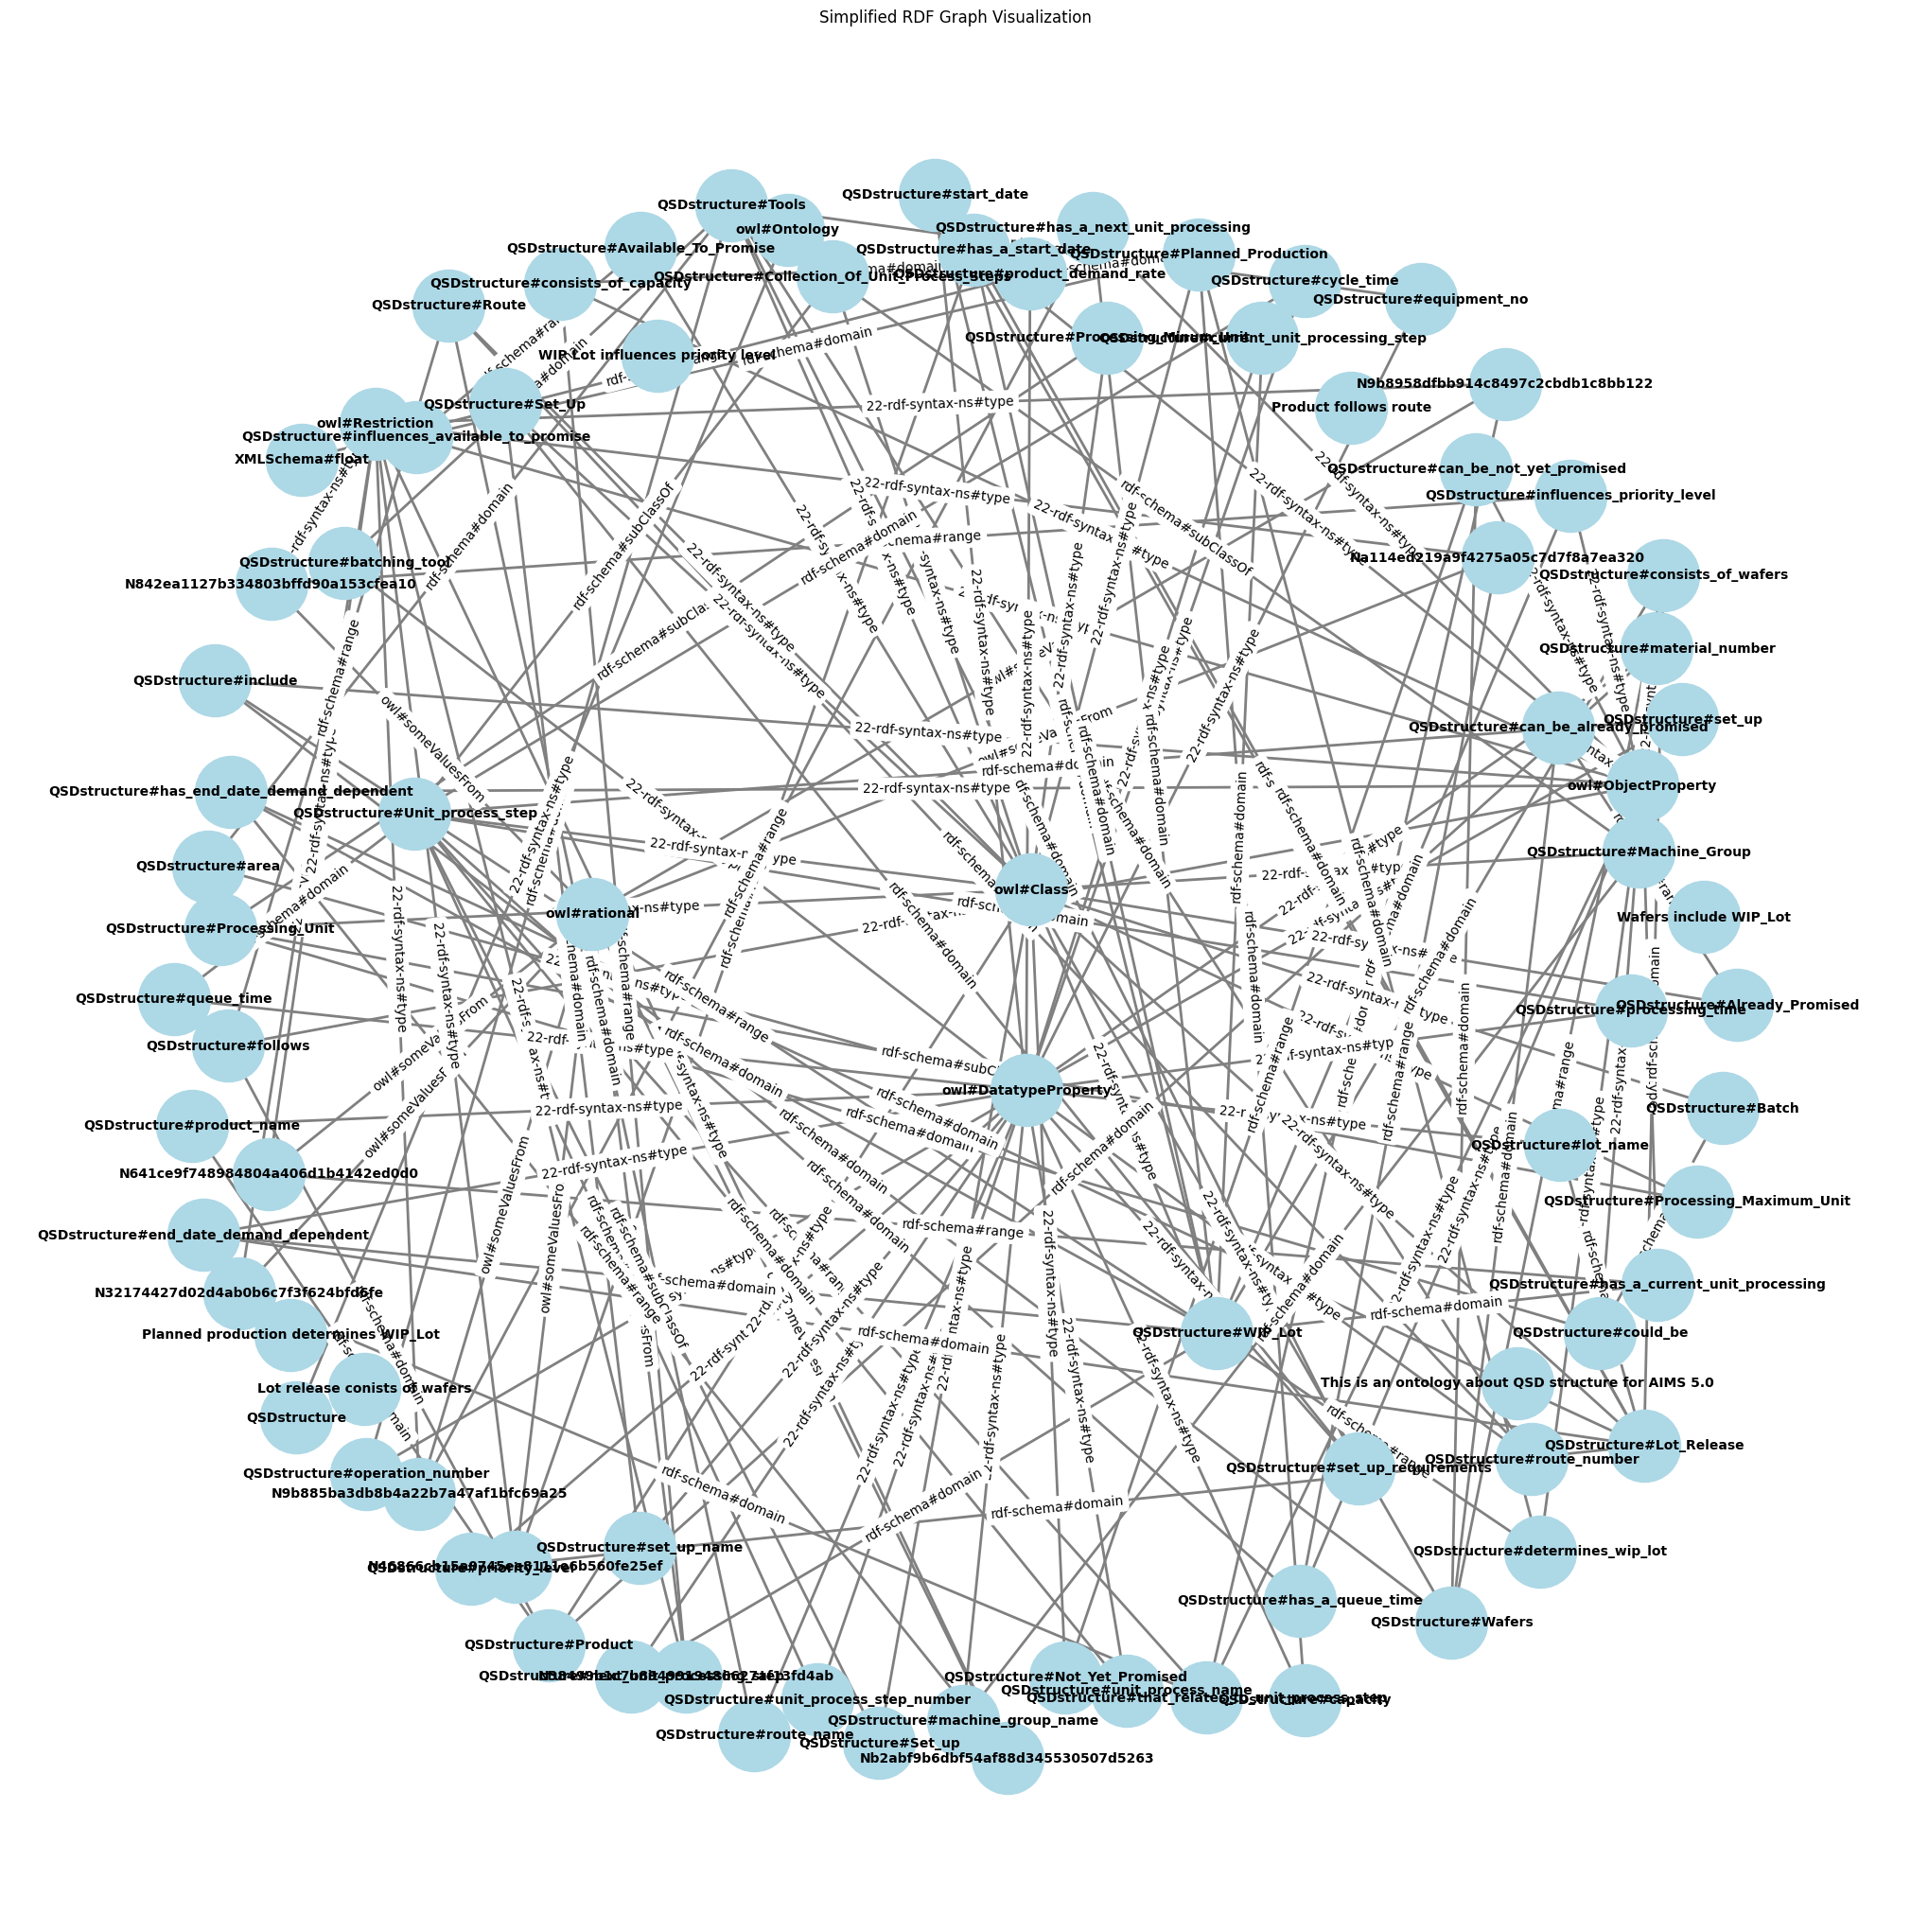

Nodes in the NetworkX graph: ['QSDstructure#that_relates_to_unit_process_step', 'N32174427d02d4ab0b6c7f3f624bfd6fe', 'N9b8958dfbb914c8497c2cbdb1c8bb122', 'owl#rational', 'owl#Restriction', 'QSDstructure#Processing_Maximum_Unit', 'QSDstructure#Processing_Unit', 'QSDstructure#equipment_no', 'QSDstructure#Tools', 'QSDstructure#could_be', 'owl#ObjectProperty', 'QSDstructure#Processing_Minum_Unit', 'owl#DatatypeProperty', 'QSDstructure#Available_To_Promise', 'owl#Class', 'QSDstructure#end_date_demand_dependent', 'QSDstructure#Lot_Release', 'N46866cb15a0745ee8111e6b560fe25ef', 'QSDstructure#start_date', 'QSDstructure#product_name', 'QSDstructure#Product', 'QSDstructure#product_demand_rate', 'XMLSchema#float', 'QSDstructure#set_up', 'N842ea1127b334803bffd90a153cfea10', 'QSDstructure#has_a_next_unit_processing', 'QSDstructure#WIP_Lot', 'QSDstructure#include', 'Wafers include WIP_Lot', 'QSDstructure', 'This is an ontology about QSD structure for AIMS 5.0', 'QSDstructure#set_up_name', 'QSDstruct

In [ ]:
# Install the required packages
!pip install rdflib
!pip install matplotlib

# Import the required libraries
import rdflib
import networkx as nx
import matplotlib.pyplot as plt  # Import matplotlib for visualization

# Specify the path to the RDF file on your Google Drive
from google.colab import drive
drive.mount('/content/drive')
QSD_structure = '/content/drive/MyDrive/Infineon/QSD_structure.rdf'

# Create a graph object and parse the RDF file
g = rdflib.Graph()
g.parse(QSD_structure, format='xml')

# Create a NetworkX graph from the parsed RDF graph
nx_graph = nx.Graph()

# Iterate through the RDF graph to extract local names of nodes and properties
for subj, pred, obj in g:
    subj_name = str(subj).split("/")[-1] if isinstance(subj, rdflib.URIRef) else str(subj)  # Extract local name or use the literal value
    obj_name = str(obj).split("/")[-1] if isinstance(obj, rdflib.URIRef) else str(obj)  # Extract local name or use the literal value
    pred_name = str(pred).split("/")[-1] if isinstance(pred, rdflib.URIRef) else str(pred)  # Extract local name or use the literal value
    nx_graph.add_edge(subj_name, obj_name, label=pred_name)

# Remove specific irrelevant edges from the NetworkX graph
irrelevant_properties = ["XMLSchema#float", "rdf-schema#comment", "owl#onProperty"]
edges_to_remove = [(n1, n2) for n1, n2, d in nx_graph.edges(data=True) if d['label'] in irrelevant_properties]
nx_graph.remove_edges_from(edges_to_remove)

# Update the property labels by removing the "QSDstructure#" prefix
for n1, n2, d in nx_graph.edges(data=True):
    if d['label'].startswith('QSDstructure#'):
        d['label'] = d['label'].replace('QSDstructure#', '')

# Visualize the updated NetworkX graph
pos = nx.spring_layout(nx_graph, k=2, iterations=50)  # Define the layout with custom parameters
plt.figure(figsize=(20, 20))  # Adjust the figure size for a larger visualization
nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', edge_color='gray', arrowsize=20, arrowstyle='->', width=2)
edge_labels = {(n1, n2): d['label'] for n1, n2, d in nx_graph.edges(data=True)}
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels)
plt.title('Simplified RDF Graph Visualization')
plt.axis('off')  # Hide the axis to improve visualization
plt.show()

# Print the nodes in the NetworkX graph to inspect the local names
print("Nodes in the NetworkX graph:", nx_graph.nodes)



REMOVE SOME CLASSES AND SHOW SUBGRAPHS RELATED TO EACH REMOVED CLASS AND THE NEW GRAPH WITHOUT THE REMOVED CLASSES

Nodes in the NetworkX graph: ['QSDstructure#Processing_Maximum_Unit', 'QSDstructure#Processing_Unit', 'QSDstructure#equipment_no', 'QSDstructure#Tools', 'N21f5ae6132094b6ca59e95e2111de1ad', 'QSDstructure#queue_time', 'N7e011fc8d0594bb789a00fd370733497', 'QSDstructure#current_unit_processing_step', 'QSDstructure#could_be', 'owl#ObjectProperty', 'QSDstructure#Processing_Minum_Unit', 'owl#DatatypeProperty', 'QSDstructure#Available_To_Promise', 'owl#Class', 'QSDstructure#end_date_demand_dependent', 'QSDstructure#Lot_Release', 'Nd56e2c38679945d29e2fa70660877747', 'owl#rational', 'QSDstructure#product_name', 'QSDstructure#Product', 'QSDstructure#product_demand_rate', 'XMLSchema#float', 'QSDstructure#set_up', 'QSDstructure#has_a_current_unit_processing', 'QSDstructure#has_a_next_unit_processing', 'QSDstructure#WIP_Lot', 'QSDstructure#include', 'Wafers include WIP_Lot', 'QSDstructure', 'This is an ontology about QSD structure for AIMS 5.0', 'QSDstructure#set_up_name', 'QSDstructure#influences_

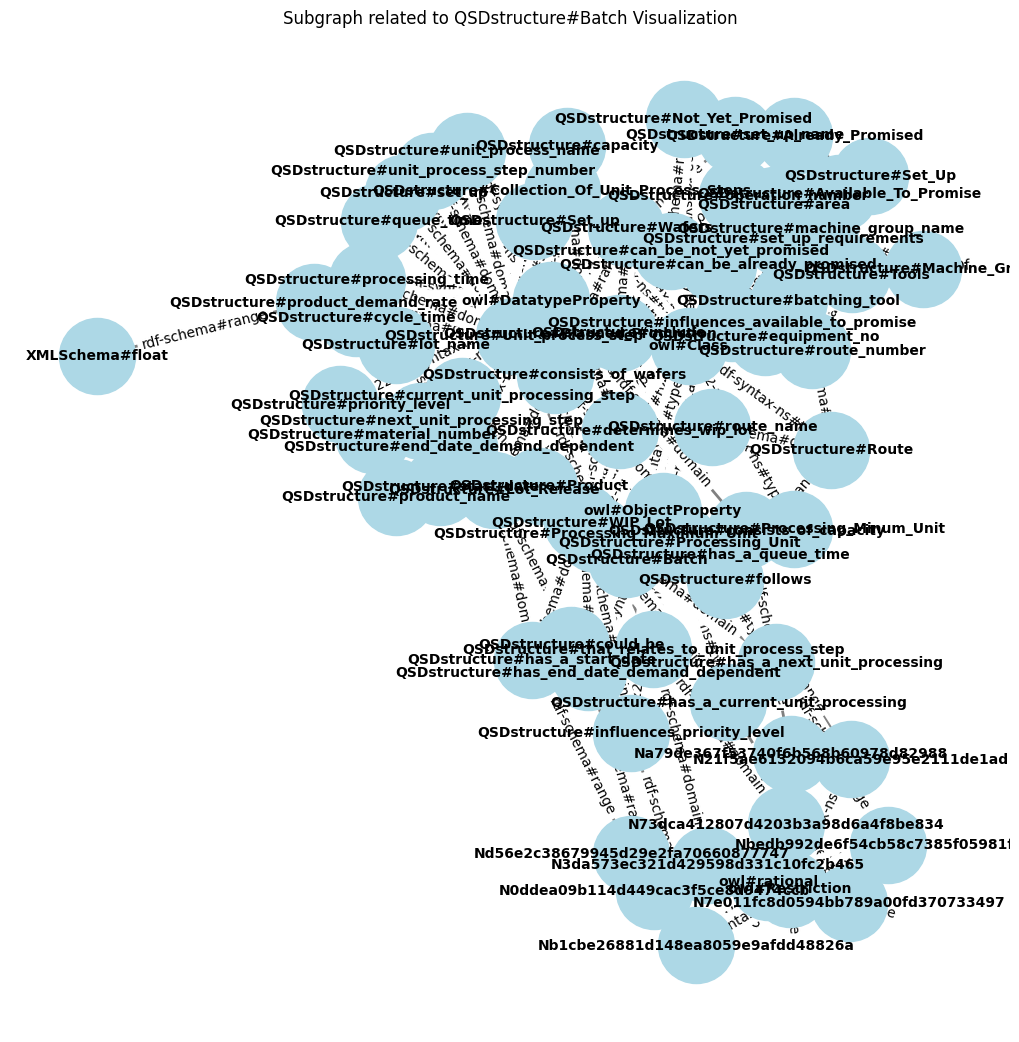

Subgraph nodes related to QSDstructure#Machine_Group: ['QSDstructure#Processing_Maximum_Unit', 'QSDstructure#Processing_Unit', 'QSDstructure#equipment_no', 'QSDstructure#Tools', 'N21f5ae6132094b6ca59e95e2111de1ad', 'QSDstructure#queue_time', 'N7e011fc8d0594bb789a00fd370733497', 'QSDstructure#current_unit_processing_step', 'QSDstructure#could_be', 'owl#ObjectProperty', 'QSDstructure#Processing_Minum_Unit', 'owl#DatatypeProperty', 'QSDstructure#Available_To_Promise', 'owl#Class', 'QSDstructure#end_date_demand_dependent', 'QSDstructure#Lot_Release', 'Nd56e2c38679945d29e2fa70660877747', 'owl#rational', 'QSDstructure#product_name', 'QSDstructure#Product', 'QSDstructure#product_demand_rate', 'XMLSchema#float', 'QSDstructure#set_up', 'QSDstructure#has_a_current_unit_processing', 'QSDstructure#has_a_next_unit_processing', 'QSDstructure#WIP_Lot', 'QSDstructure#include', 'QSDstructure#set_up_name', 'QSDstructure#influences_priority_level', 'N73dca412807d4203b3a98d6a4f8be834', 'QSDstructure#influ

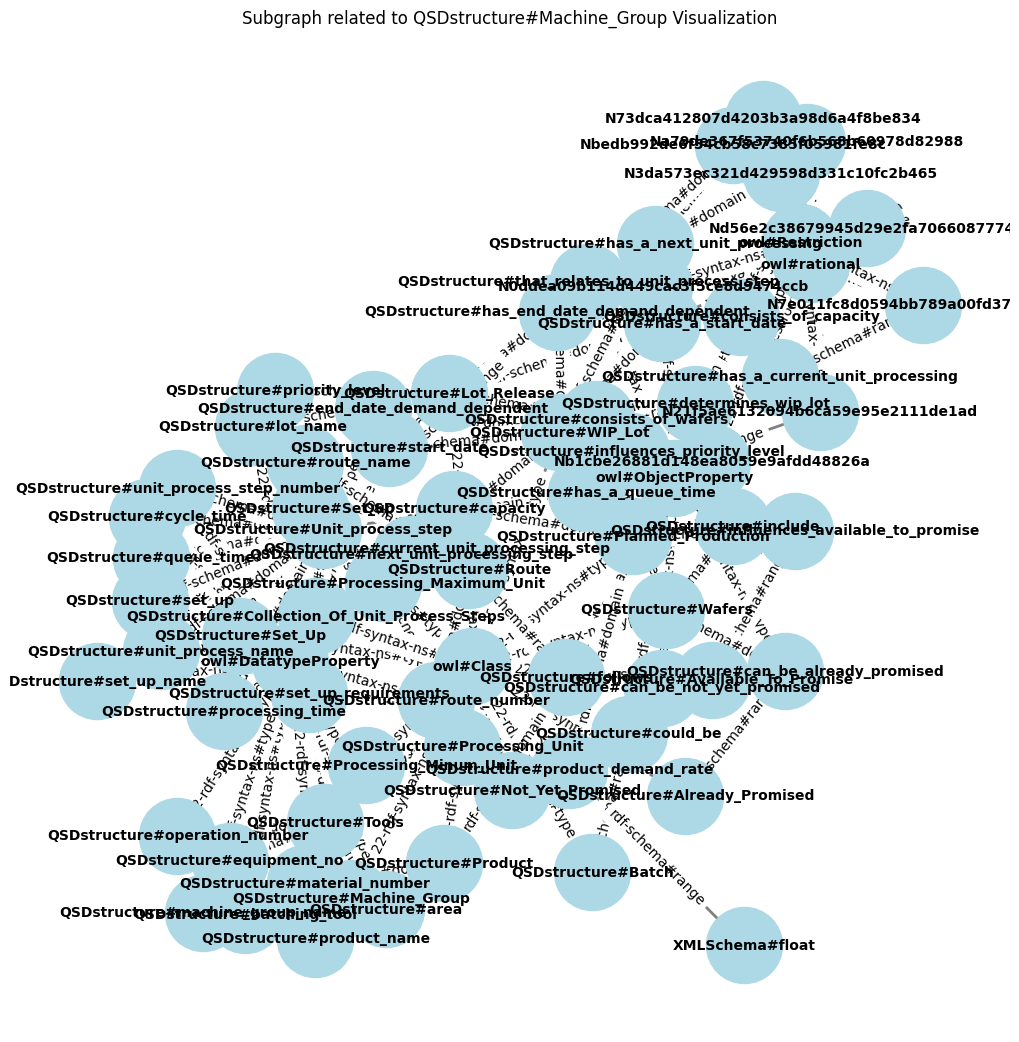

Subgraph nodes related to QSDstructure#Product: ['QSDstructure#Processing_Maximum_Unit', 'QSDstructure#Processing_Unit', 'QSDstructure#equipment_no', 'QSDstructure#Tools', 'N21f5ae6132094b6ca59e95e2111de1ad', 'QSDstructure#queue_time', 'N7e011fc8d0594bb789a00fd370733497', 'QSDstructure#current_unit_processing_step', 'QSDstructure#could_be', 'owl#ObjectProperty', 'QSDstructure#Processing_Minum_Unit', 'owl#DatatypeProperty', 'QSDstructure#Available_To_Promise', 'owl#Class', 'QSDstructure#end_date_demand_dependent', 'QSDstructure#Lot_Release', 'Nd56e2c38679945d29e2fa70660877747', 'owl#rational', 'QSDstructure#product_name', 'QSDstructure#Product', 'QSDstructure#product_demand_rate', 'XMLSchema#float', 'QSDstructure#set_up', 'QSDstructure#has_a_current_unit_processing', 'QSDstructure#has_a_next_unit_processing', 'QSDstructure#WIP_Lot', 'QSDstructure#include', 'QSDstructure#set_up_name', 'QSDstructure#influences_priority_level', 'N73dca412807d4203b3a98d6a4f8be834', 'QSDstructure#influences_

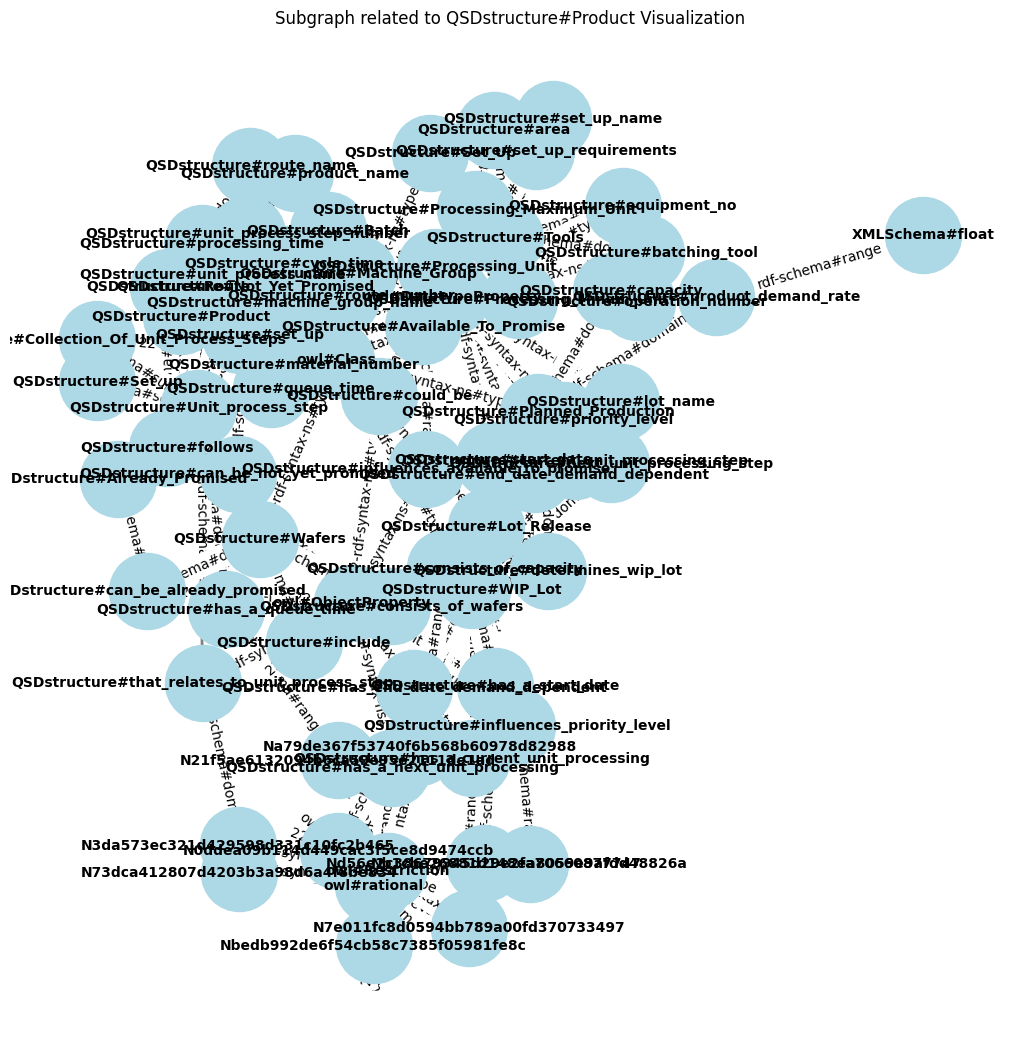

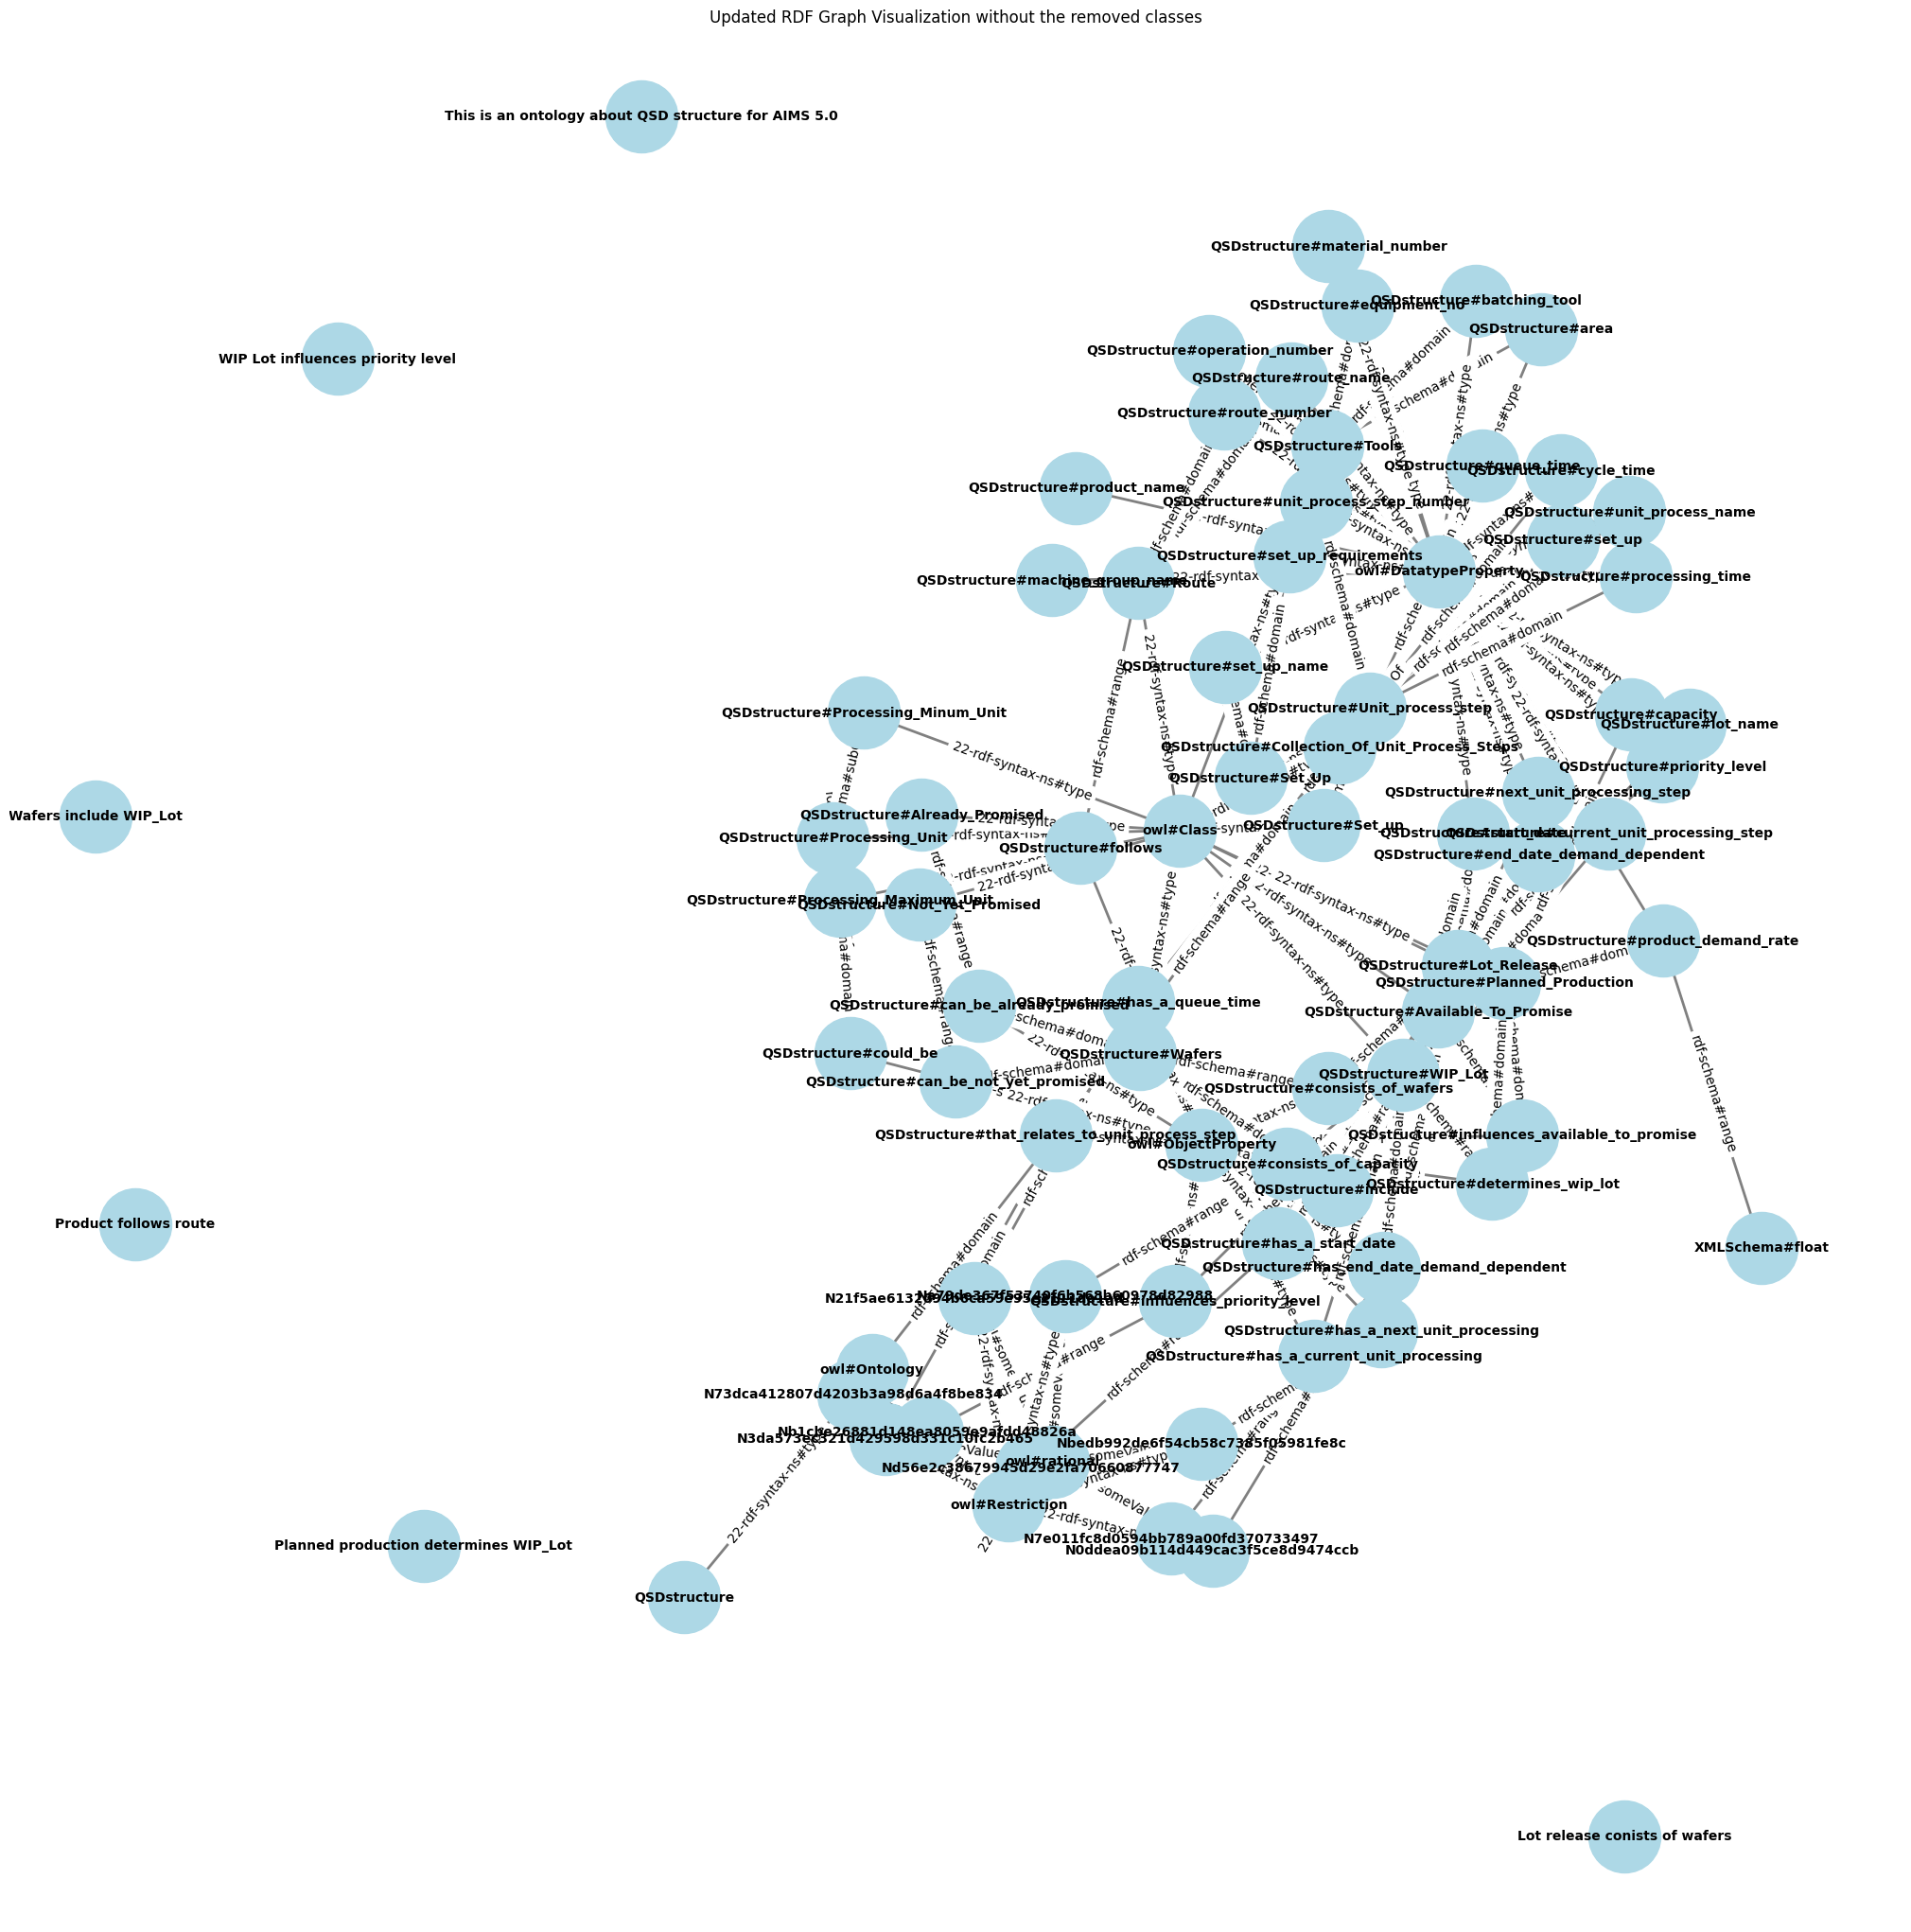

In [ ]:
# ... (previous code for graph creation and visualization) ...

# Print the nodes in the NetworkX graph to inspect the local names
print("Nodes in the NetworkX graph:", nx_graph.nodes)

# Extract subgraphs related to specific classes
specific_classes = ['QSDstructure#Batch', 'QSDstructure#Machine_Group', 'QSDstructure#Product']  # Replace with the actual class names of interest

for class_name in specific_classes:
    if class_name in nx_graph.nodes:
        subgraph_class = nx_graph.subgraph(nx.node_connected_component(nx_graph, class_name))
        print(f"Subgraph nodes related to {class_name}:", subgraph_class.nodes)  # Print the nodes in the subgraph related to the specific class
        print(f"Subgraph edges related to {class_name}:", subgraph_class.edges)  # Print the edges in the subgraph related to the specific class

        # Visualize the subgraph related to the specific class
        plt.figure(figsize=(10, 10))  # Adjust the figure size for the subgraph visualization
        pos_subgraph_class = nx.spring_layout(subgraph_class, k=0.3, iterations=50)  # Define the layout for the subgraph related to the specific class
        nx.draw(subgraph_class, pos_subgraph_class, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', edge_color='gray', arrowsize=20, arrowstyle='->', width=2)
        edge_labels_subgraph_class = {(n1, n2): d['label'] for n1, n2, d in subgraph_class.edges(data=True)}
        nx.draw_networkx_edge_labels(subgraph_class, pos_subgraph_class, edge_labels=edge_labels_subgraph_class)
        plt.title(f'Subgraph related to {class_name} Visualization')
        plt.axis('off')  # Hide the axis to improve visualization
        plt.show()
    else:
        print(f"The specific class '{class_name}' does not exist in the NetworkX graph.")

# Visualize the updated NetworkX graph without the removed classes
nx_graph_without_classes = nx_graph.copy()
nx_graph_without_classes.remove_nodes_from([n for n in nx_graph.nodes if n in specific_classes])
pos_updated = nx.spring_layout(nx_graph_without_classes, k=0.3, iterations=50)  # Define the layout for the updated graph without the removed classes
plt.figure(figsize=(20, 20))  # Adjust the figure size for the updated graph visualization
nx.draw(nx_graph_without_classes, pos_updated, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', edge_color='gray', arrowsize=20, arrowstyle='->', width=2)
edge_labels_updated = {(n1, n2): d['label'] for n1, n2, d in nx_graph_without_classes.edges(data=True)}
nx.draw_networkx_edge_labels(nx_graph_without_classes, pos_updated, edge_labels=edge_labels_updated)
plt.title('Updated RDF Graph Visualization without the removed classes')
plt.axis('off')  # Hide the axis to improve visualization
plt.show()


REPLACE THE REMOVED CLASSES WITH ANOTHER ONES

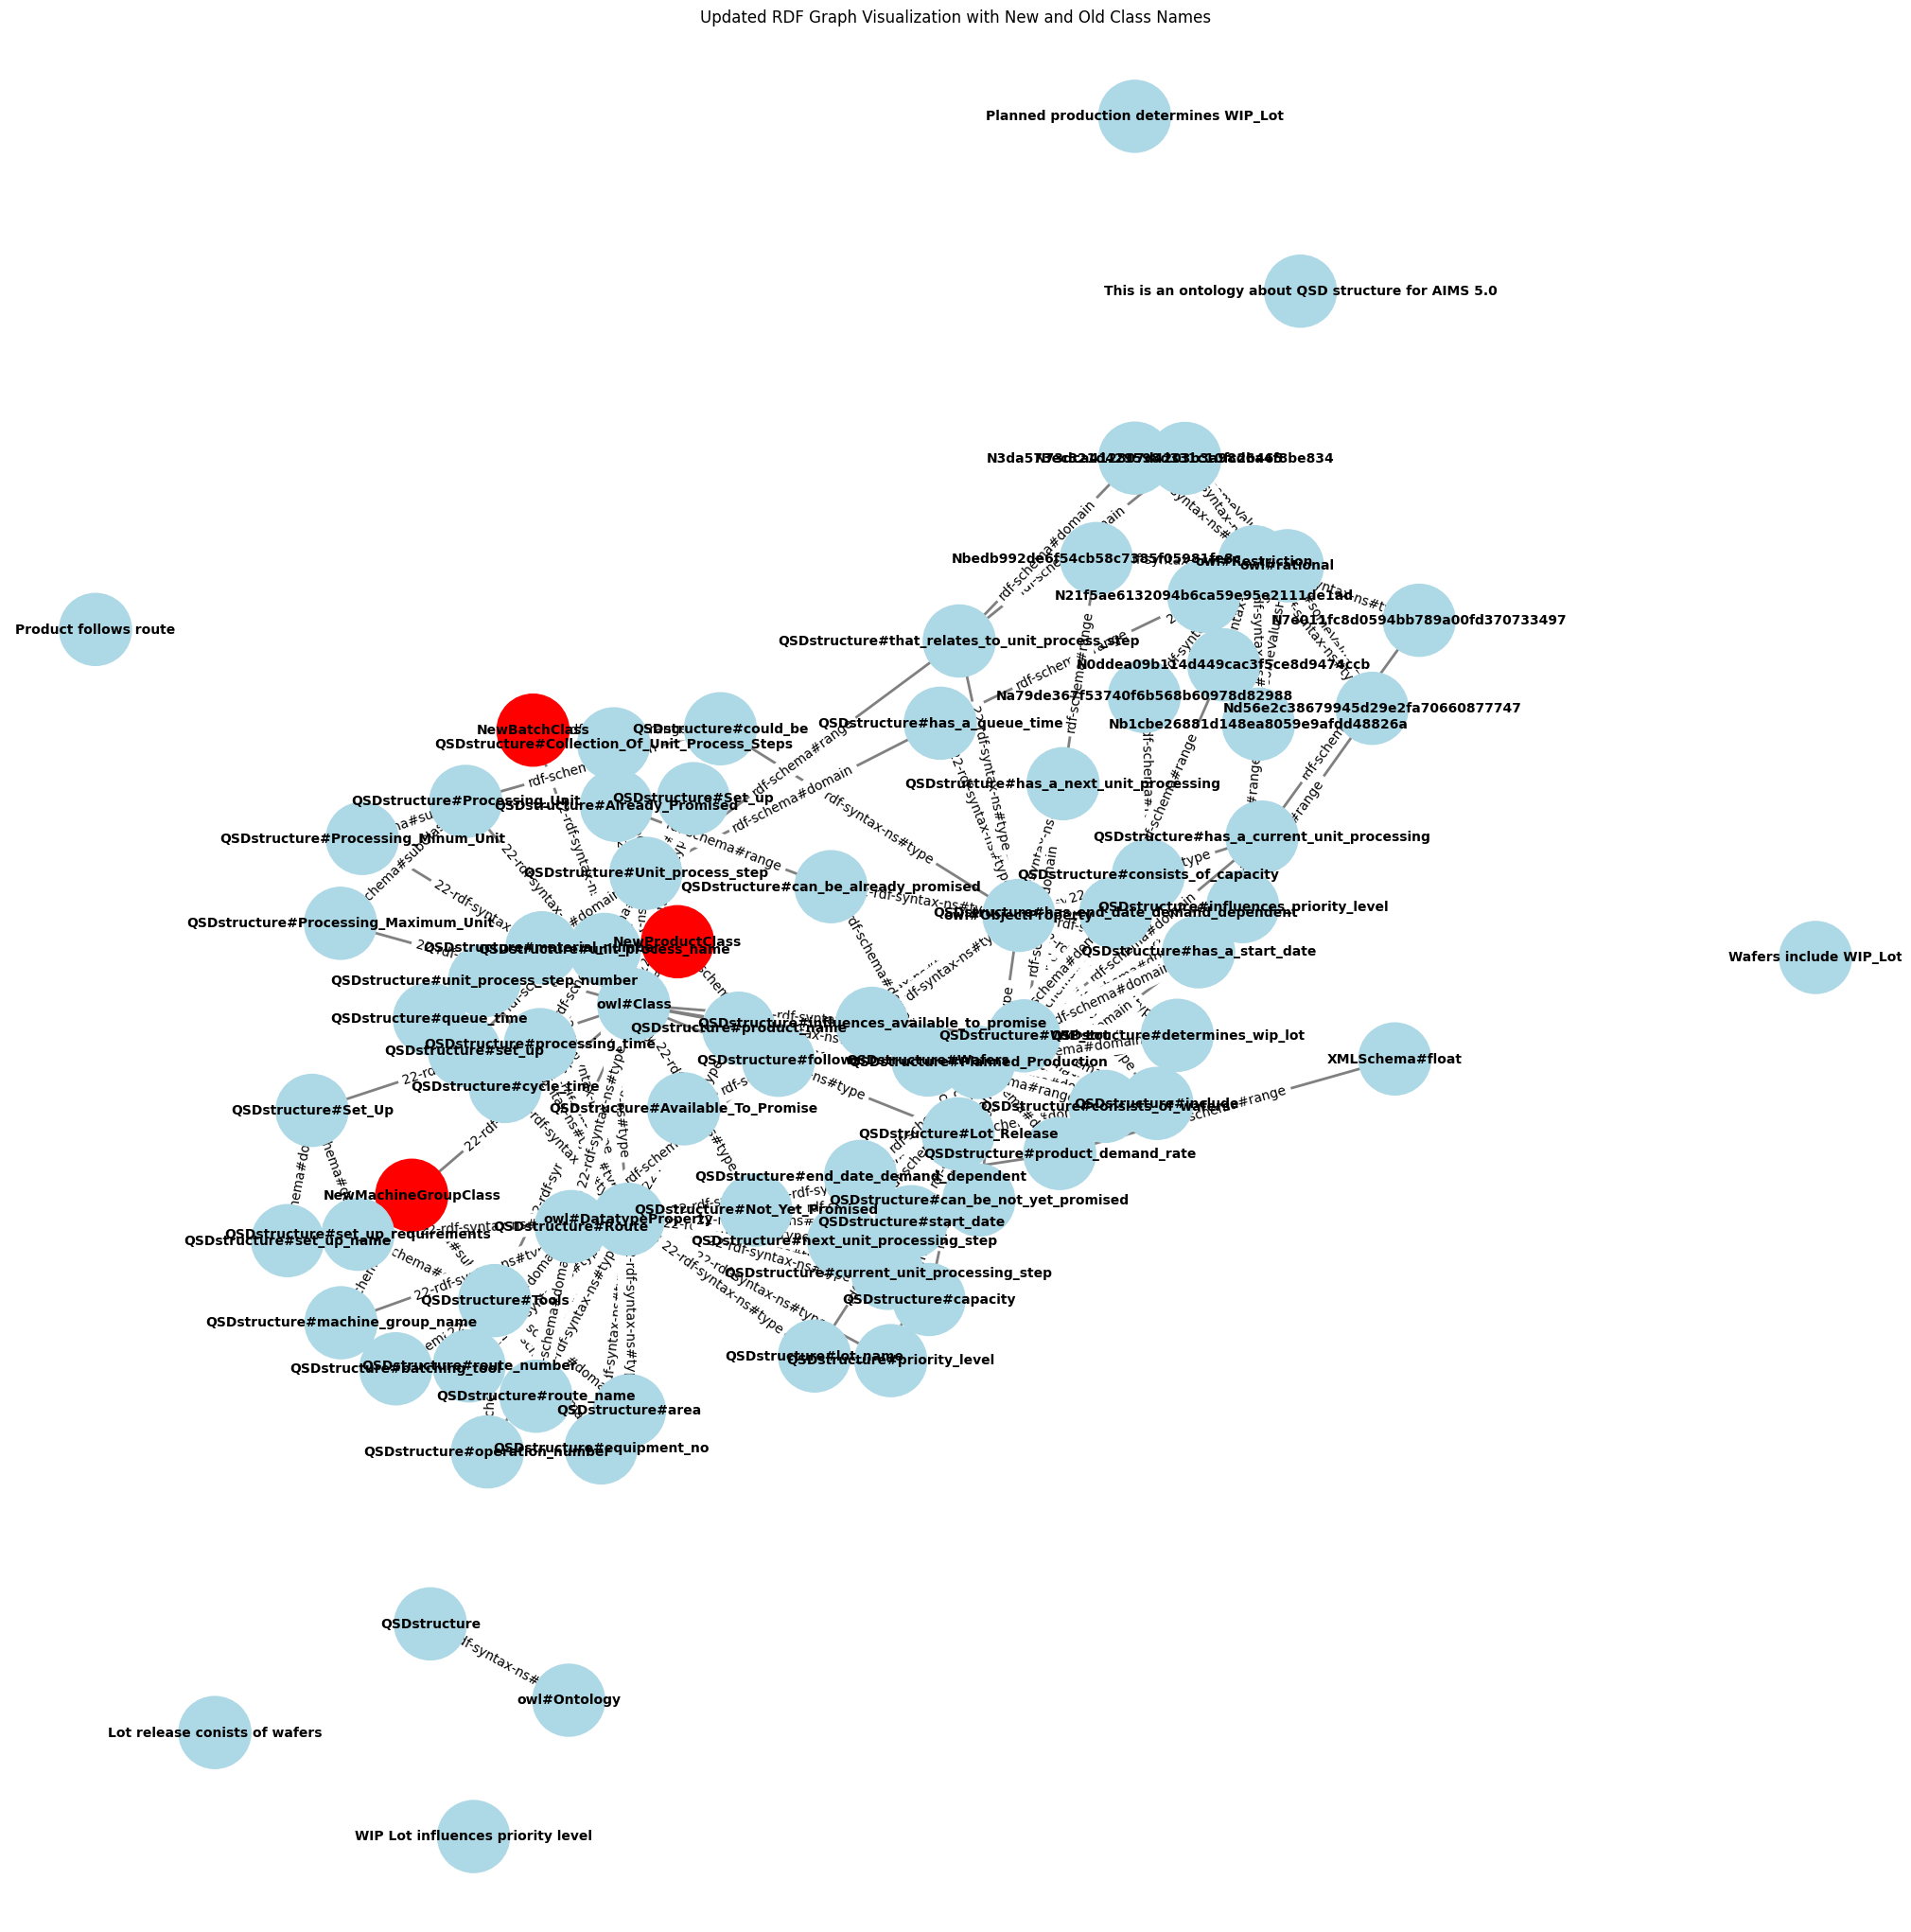

In [ ]:
# Visualize the updated NetworkX graph with the new and old class names
plt.figure(figsize=(20, 20))  # Adjust the figure size for the updated graph visualization
pos_updated_with_new_classes = nx.spring_layout(nx_graph_with_new_classes, k=0.3, iterations=50)  # Define the layout for the updated graph with the new class names

# Draw nodes for the new class names in red and for the old ones in light blue
node_colors = ['red' if node in new_class_names.values() else 'lightblue' for node in nx_graph_with_new_classes.nodes]
nx.draw(nx_graph_with_new_classes, pos_updated_with_new_classes, with_labels=True, node_color=node_colors, node_size=3000, font_size=10, font_weight='bold', edge_color='gray', arrowsize=20, arrowstyle='->', width=2)

# Draw edge labels
edge_labels_updated_with_new_classes = {(n1, n2): d['label'] for n1, n2, d in nx_graph_with_new_classes.edges(data=True)}
nx.draw_networkx_edge_labels(nx_graph_with_new_classes, pos_updated_with_new_classes, edge_labels=edge_labels_updated_with_new_classes)

plt.title('Updated RDF Graph Visualization with New and Old Class Names')
plt.axis('off')  # Hide the axis to improve visualization
plt.show()
